In [2]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading in data from file
def Reading_File(filename):
    fp = open(filename , 'r')
    data = fp.readlines()
    N = int(data.pop(0)) #getting no. of cities
    x_coordinate , y_coordinate = [] , []
    for i in data:
        k= i.split()
        x_coordinate.append(float(k[0]))
        y_coordinate.append(float(k[1]))
    return N , x_coordinate , y_coordinate

In [4]:
def Unpack_Coord(cities):
    N = len(cities)
    x_coordinate , y_coordinate = [] , []
    for i in cities: #unpacking x and y coordinates seperately
        x_coordinate.append(i[0]) 
        y_coordinate.append(i[1])
        
    # Converting x , y coordinates to (N,1) dimension np arrays
    x_coordinate = np.reshape(np.array(x_coordinate) , (N,1) ) 
    y_coordinate = np.reshape(np.array(y_coordinate) , (N,1) )
    
    return x_coordinate , y_coordinate
    

In [5]:
def distance_func(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2) #distance between two points

def distance(cities , cityorder):
    N = len(cities)
    x_coordinate , y_coordinate = Unpack_Coord(cities) #Getting x and y coordinates seperately

    # Rearrange for getting distance
    x_cities = x_coordinate[cityorder]
    y_cities = y_coordinate[cityorder]
    
    total_dist = 0
    for i in range(len(cities)):
        total_dist += distance_func(x_cities[i-1], y_cities[i-1], x_cities[i], y_cities[i])
        
    return total_dist
    

In [6]:
def distance_func(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2) #distance between two points

def distance(cities , cityorder):
    N = len(cities)
    x_coordinate , y_coordinate = Unpack_Coord(cities) #Getting x and y coordinates seperately

    # Rearrange for getting distance
    x_cities = x_coordinate[cityorder]
    y_cities = y_coordinate[cityorder]
    
    total_dist = 0
    for i in range(len(cities)):
        #print(x_cities[i] , y_cities[i])
        total_dist += distance_func(x_cities[i-1], y_cities[i-1], x_cities[i], y_cities[i])
        #print(total_dist)
        
    return total_dist
    

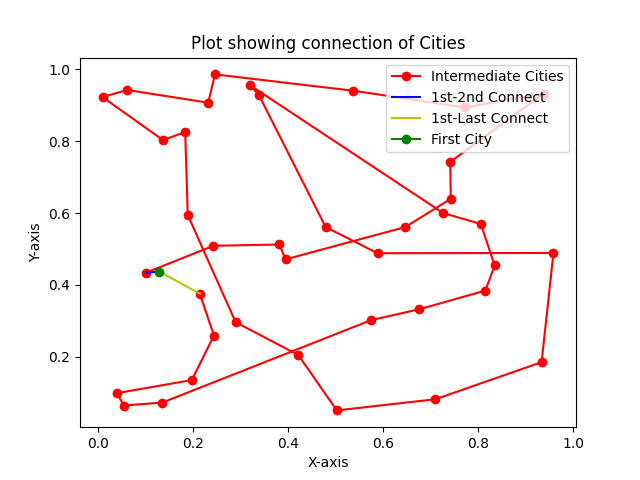

The City Order is [15 23 25 16  1 31  8 35  2  7 32  5 29  0  9 28 37 39 11 17 19 20 30 33
  6 36  4 12 27 13 24 18 26 21 38 10 22 34  3 14] and the minimum distance is d = 7.155829730703569

The first random distance guess generated was 20.365669083061096.
The percentage improvement is 64.86327210012782


In [9]:
def tsp(cities):
    N = len(cities)
    #defining SimAnneal parameters
    T = 2000
    decay_rate = 0.99
    current_guess = 10000
    best_distance = current_guess #This will hold the final optimum distance
    city_order_good = np.arange(N) #This will hold the final optimum cityorder
    city_order_rand = np.arange(N) #This will hold the current cityorder
    
    global first_dist #global because this variable is outside all functions

    for i in range(10000): #run the function 10000 times     
        # generating 2 random integers to modify the cityorder
        n1,n2 = np.random.randint(0,N) , np.random.randint(0,N) 
        city_order_current = city_order_rand.copy() 
        city_order_current[n1] , city_order_current[n2] = city_order_current[n2] , city_order_current[n1]

        d = distance(cities, city_order_current) #distance from random order
        
        if i == 0: #since we need the first random distance for percentage improvement
            first_dist = float(d)

        if d < current_guess : #random distance is better than previous guess then update current_guess and cityorder
            current_guess = d
            city_order_rand = city_order_current
        else:
            toss = np.random.random_sample() 
            if toss < np.exp(-(d - current_guess)/T): 
                current_guess = d
                city_order_rand = city_order_current
                
                if current_guess < best_distance : #Update best_distance if current_guess is better
                    best_distance = current_guess
                    city_order_good = city_order_rand.copy()                 
            pass
        
        T = T * decay_rate #update Temperature 
            
    return city_order_good
   

first_dist = 0 #first random distance for percentage improvement

# All the function calls
N , x_coord , y_coord = Reading_File("tsp40.txt")
cities = list(zip(x_coord, y_coord)) #make list of tuples from x,y coordinates
city_order = tsp(cities) #cityorder corresponding to minimum distance
d = float(distance(cities,city_order)) #minimum distance
percent_improve = float(((first_dist - d)/first_dist)*100) #percentage improvement

x_coor_final , y_coor_final = Unpack_Coord(cities) #getting x,y coordinates as np arrays for plotting
# rearranging coordinates for proper plotting
x_coor_final = x_coor_final[city_order]
y_coor_final = y_coor_final[city_order]

# All commands related to Plotting
plt.clf() 
plt.plot(x_coor_final[1:N+1] , y_coor_final[1:N+1] , 'ro-')
plt.plot([x_coor_final[0], x_coor_final[1]], [y_coor_final[0], y_coor_final[1]], 'b-')
plt.plot([x_coor_final[0], x_coor_final[-1]], [y_coor_final[0], y_coor_final[-1]], 'y-')
plt.plot(x_coor_final[0], y_coor_final[0], 'go-')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(["Intermediate Cities" , "1st-2nd Connect" , "1st-Last Connect" , "First City"])
plt.title("Plot showing connection of Cities")
plt.show()

print(f"The City Order is {city_order} and the minimum distance is d = {d}")
print(f"\nThe first random distance guess generated was {first_dist}.\nThe percentage improvement is {percent_improve}")